<a href="https://colab.research.google.com/github/yoshitha1209/Machine-Learning/blob/main/23003_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0 1]
Accuracy of kNN (k=3): 0.7333333333333333
Predictions: [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
Predicted class for test vector: [1.]


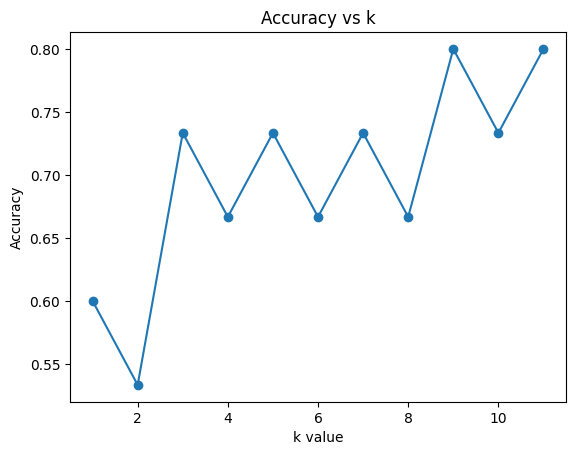

Confusion Matrix:
 [[ 1  2]
 [ 2 10]]


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
df = pd.read_excel("/content/drive/MyDrive/Copy of training_mathbert(1).xlsx", usecols=['embed_0', 'embed_1', 'output'])
X = df.drop(columns=["output"])
y = df["output"]
y = pd.cut(y, bins=3, labels=False)
selected_classes = y.unique()[:2]
print(selected_classes)
df_binary = df[df["output"].isin(selected_classes)]
X_binary = df_binary.drop(columns=["output"])
y_binary = df_binary["output"]
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print("Accuracy of kNN (k=3):", accuracy)
y_pred = knn.predict(X_test)
print("Predictions:", y_pred)
test_vector = X_test.iloc[0:1]
predicted_class = knn.predict(test_vector)
print("Predicted class for test vector:", predicted_class)
k_values = range(1, 12)
accuracies = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).score(X_test, y_test) for k in k_values]
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.show()
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

df = pd.read_excel("/content/Lab Session Data.xlsx", usecols=['Customer','Candies (#)','Mangoes (Kg)','Milk Packets (#)','Payment (Rs)'])
print("Contents in csv file:\n", df)

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2 Score:", r2)


Contents in csv file:
   Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
MSE: 1.5348077771980006e-26
RMSE: 1.2388735920980804e-13
MAPE: 6.708279181313805e-16
R2 Score: 1.0


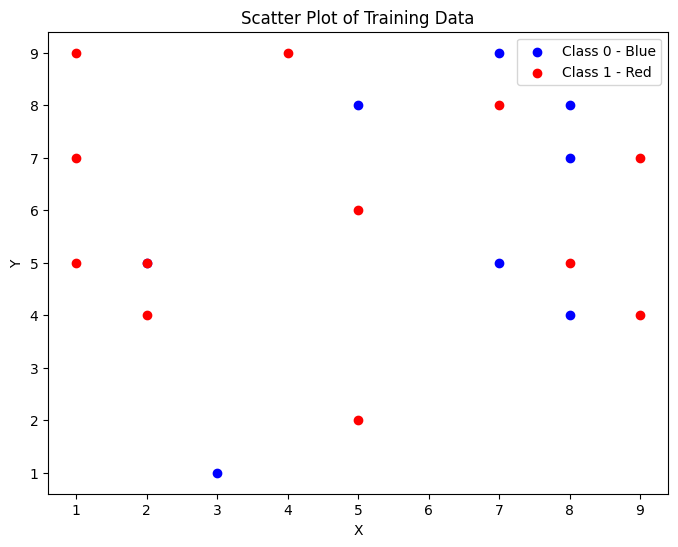

In [9]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randint(1, 11, 20)
Y = np.random.randint(1, 11, 20)
classes = np.random.choice([0, 1], size=20)
plt.figure(figsize=(8,6))
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 - Blue')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 - Red')
plt.title('Scatter Plot of Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


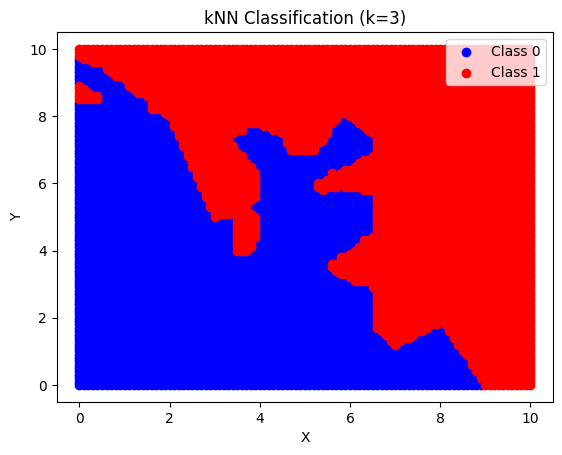

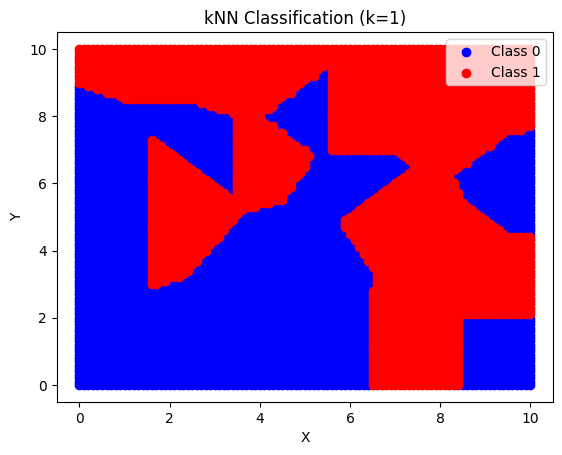

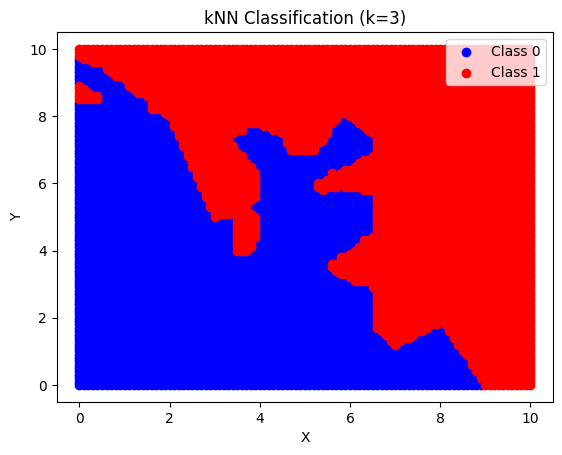

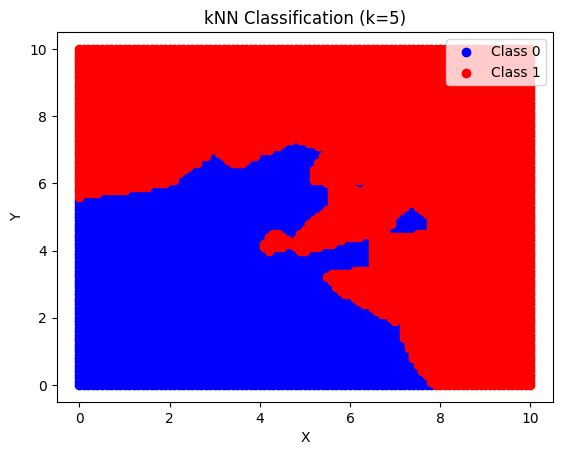

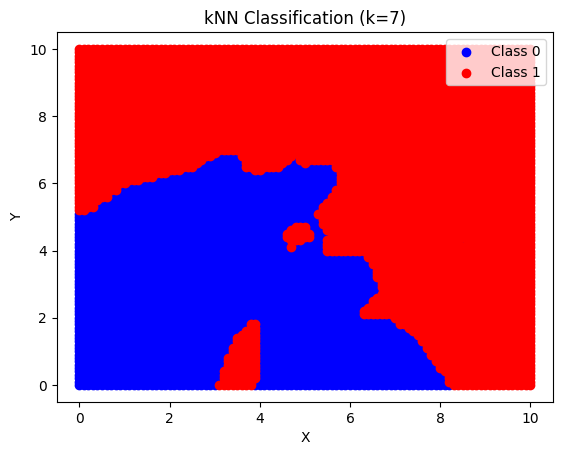

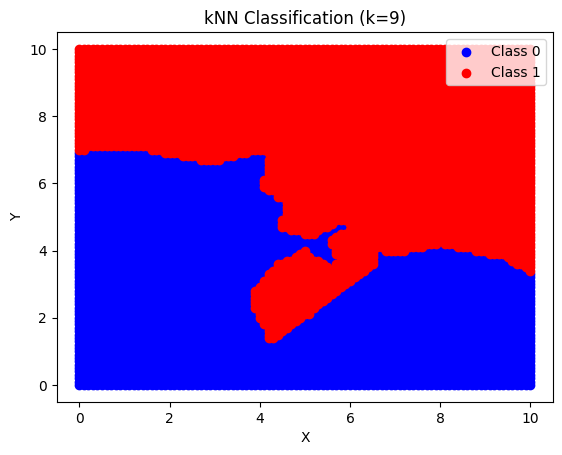

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_data():
    X_train = np.random.randint(1, 11, 20)
    Y_train = np.random.randint(1, 11, 20)
    classes_train = np.random.choice([0, 1], size=20)
    return X_train, Y_train, classes_train

def generate_test_data():
    X_test = np.arange(0, 10.1, 0.1)
    Y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(X_test, Y_test)
    X_test = X_test.ravel()
    Y_test = Y_test.ravel()
    return X_test, Y_test

def classify_and_plot(X_train, Y_train, classes_train, X_test, Y_test, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(np.column_stack((X_train, Y_train)), classes_train)
    classes_pred = model.predict(np.column_stack((X_test, Y_test)))
    plt.scatter(X_test[classes_pred == 0], Y_test[classes_pred == 0], color='blue', label='Class 0')
    plt.scatter(X_test[classes_pred == 1], Y_test[classes_pred == 1], color='red', label='Class 1')
    plt.title(f'kNN Classification (k={k})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


X_train, Y_train, classes_train = generate_data()
X_test, Y_test = generate_test_data()
classify_and_plot(X_train, Y_train, classes_train, X_test, Y_test, k=3)

for k in [1, 3, 5, 7, 9]:
    classify_and_plot(X_train, Y_train, classes_train, X_test, Y_test, k)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


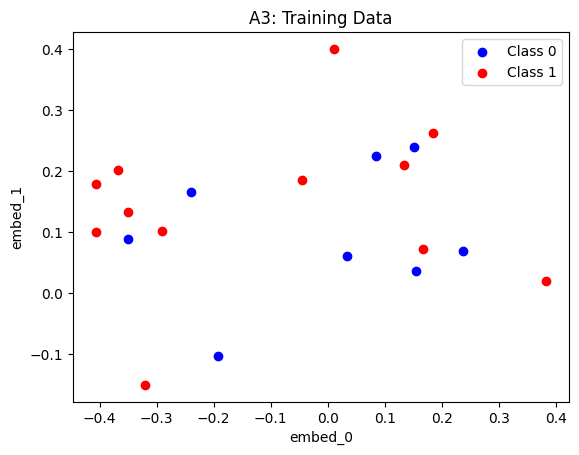

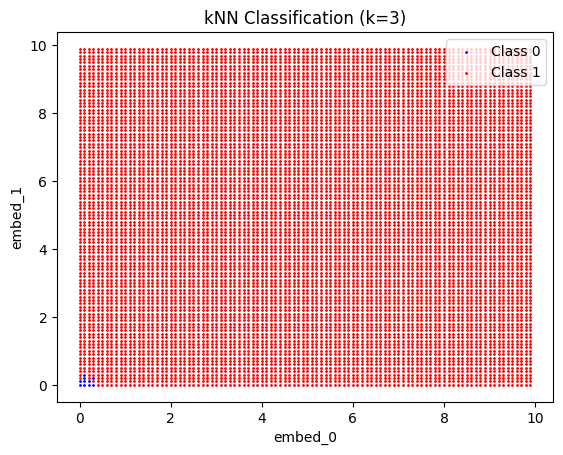

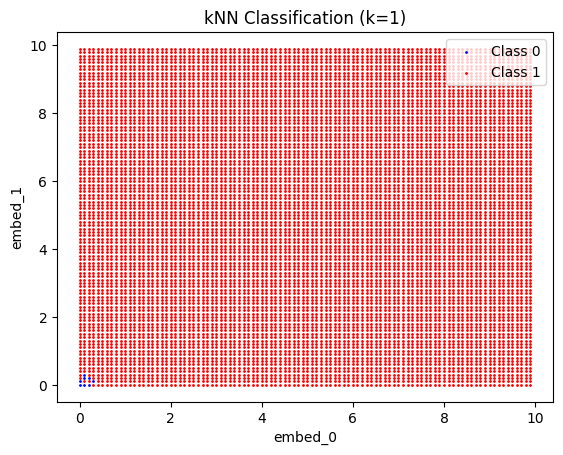

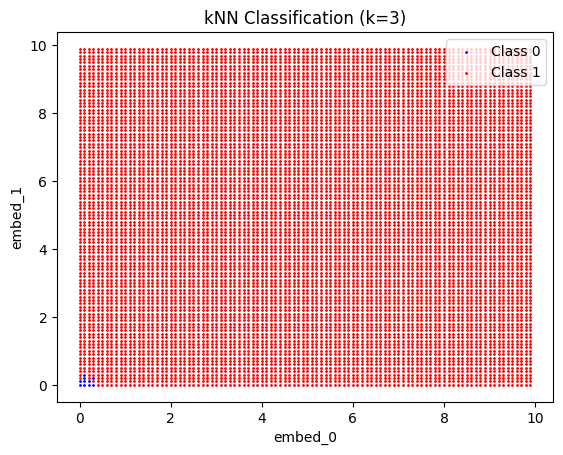

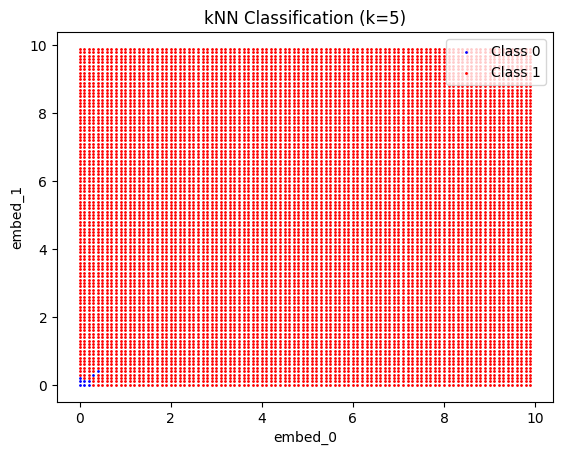

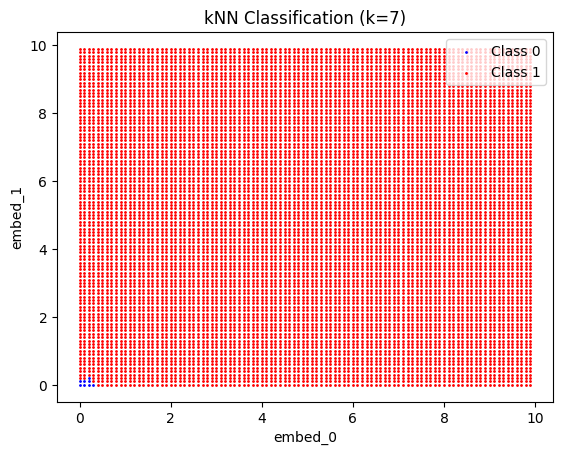

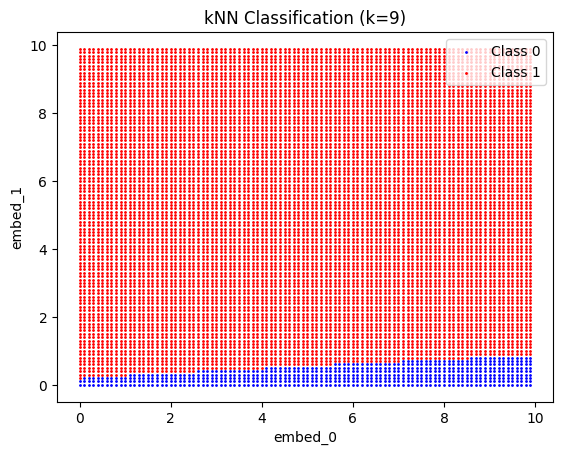

In [10]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
file_path="/content/drive/MyDrive/Copy of training_mathbert(1).xlsx"
df=pd.read_excel(file_path)
np.random.seed(42)
df['Class']=np.random.choice([0,1],size=len(df))
train_df=df.sample(n=20,random_state=42)
X_train,Y_train,classes_train=train_df['embed_0'].values,train_df['embed_1'].values,train_df['Class'].values
plt.scatter(X_train[classes_train==0],Y_train[classes_train==0],color='blue',label='Class 0')
plt.scatter(X_train[classes_train==1],Y_train[classes_train==1],color='red',label='Class 1')
plt.title("A3: Training Data")
plt.xlabel("embed_0")
plt.ylabel("embed_1")
plt.legend()
plt.show()
X_test,Y_test=np.meshgrid(np.arange(0,10,0.1),np.arange(0,10,0.1))
X_test,Y_test=X_test.ravel(),Y_test.ravel()
def classify_and_plot(X_train,Y_train,classes_train,X_test,Y_test,k):
 model=KNeighborsClassifier(n_neighbors=k)
 model.fit(np.column_stack((X_train,Y_train)),classes_train)
 classes_pred=model.predict(np.column_stack((X_test,Y_test)))
 plt.scatter(X_test[classes_pred==0],Y_test[classes_pred==0],color='blue',s=1,label='Class 0')
 plt.scatter(X_test[classes_pred==1],Y_test[classes_pred==1],color='red',s=1,label='Class 1')
 plt.title(f'kNN Classification (k={k})')
 plt.xlabel("embed_0")
 plt.ylabel("embed_1")
 plt.legend()
 plt.show()
classify_and_plot(X_train,Y_train,classes_train,X_test,Y_test,k=3)
for k in[1,3,5,7,9]:classify_and_plot(X_train,Y_train,classes_train,X_test,Y_test,k)



In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

file_path = "/content/drive/MyDrive/Copy of training_mathbert(1).xlsx"
data = pd.read_excel(file_path)

X = data[['embed_0', 'embed_1']]
y = data['output']

y = pd.cut(y, bins=3, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 31)}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best k using GridSearchCV: {grid_search.best_params_['n_neighbors']}")

random_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)
print(f"Best k using RandomizedSearchCV: {random_search.best_params_['n_neighbors']}")

Best k using GridSearchCV: 27
Best k using RandomizedSearchCV: 10
